In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [7]:
train_df = pd.read_csv("/Users/Devyani/msads/ml1/project/train_data.csv")
test_df = pd.read_csv("/Users/Devyani/msads/ml1/project/test_data.csv")

In [9]:
train_df.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,...,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes,Attrition
0,47,1225,2,4,1,1676,2,47,4,2,...,False,False,False,True,False,False,True,True,False,0
1,22,594,2,1,1,169,3,100,3,4,...,False,False,False,False,True,False,True,True,False,0
2,46,406,3,1,1,1124,1,52,3,3,...,False,False,False,False,True,False,True,True,False,0
3,25,622,13,1,1,645,2,40,3,3,...,False,False,True,False,True,False,True,True,False,0
4,43,1001,9,5,1,663,4,72,3,3,...,False,False,False,True,False,False,True,False,True,0


In [11]:
test_df.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,...,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes,Attrition
0,24,830,13,2,1,1495,4,78,3,2,...,False,False,True,False,True,False,True,True,False,0
1,44,1117,2,1,1,1246,1,72,4,4,...,True,False,False,False,True,False,True,True,False,0
2,31,688,7,3,1,613,3,44,2,4,...,False,False,False,True,False,False,True,True,False,0
3,44,1199,4,2,1,1288,3,92,4,1,...,False,False,False,True,False,False,True,True,False,0
4,36,318,9,3,1,90,4,79,2,3,...,True,False,False,False,True,False,True,False,True,1


In [102]:
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train_df)
test_scaled = scaler.transform(test_df)

In [104]:
K_range = range(2, 20)  
inertia_values = []
silhouette_scores = []

In [106]:
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(train_scaled)
    inertia_values.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(train_scaled, cluster_labels))

Text(0.5, 1.0, 'Elbow Method: Optimal K')

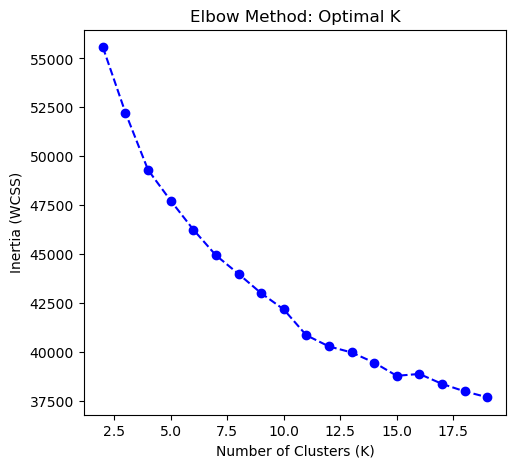

In [108]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(K_range, inertia_values, marker='o', linestyle='--', color='blue')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (WCSS)")
plt.title("Elbow Method: Optimal K")

Text(0.5, 1.0, 'Silhouette Scores for Different K')

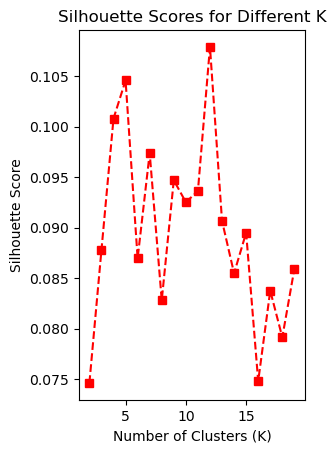

In [110]:
plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette_scores, marker='s', linestyle='--', color='red')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for Different K")

In [114]:
for i, k in enumerate(K_range):
    print(f"K={k}: Silhouette Score = {silhouette_scores[i]:.4f}")

K=2: Silhouette Score = 0.0746
K=3: Silhouette Score = 0.0878
K=4: Silhouette Score = 0.1008
K=5: Silhouette Score = 0.1046
K=6: Silhouette Score = 0.0870
K=7: Silhouette Score = 0.0974
K=8: Silhouette Score = 0.0828
K=9: Silhouette Score = 0.0947
K=10: Silhouette Score = 0.0925
K=11: Silhouette Score = 0.0936
K=12: Silhouette Score = 0.1079
K=13: Silhouette Score = 0.0907
K=14: Silhouette Score = 0.0855
K=15: Silhouette Score = 0.0895
K=16: Silhouette Score = 0.0748
K=17: Silhouette Score = 0.0838
K=18: Silhouette Score = 0.0792
K=19: Silhouette Score = 0.0859


In [112]:
optimal_k = K_range[np.argmax(silhouette_scores)]
print(f"Optimal number of clusters (K): {optimal_k}")

Optimal number of clusters (K): 12


In [116]:
trial_k = 12

In [118]:
kmeans = KMeans(n_clusters=trial_k, random_state=42, n_init=10)
train_clusters = kmeans.fit_predict(train_scaled)
test_clusters = kmeans.predict(test_scaled)

In [120]:
centroids = kmeans.cluster_centers_
centroids_original = scaler.inverse_transform(centroids)

In [122]:
print("Final Centroids (Original Scale):\n", centroids_original)

Final Centroids (Original Scale):
 [[ 3.83274336e+01  8.06212389e+02  9.14159292e+00  2.87610619e+00
   1.00000000e+00  9.50601770e+02  2.94690265e+00  6.39026549e+01
   2.70796460e+00  2.57522124e+00  7.30502655e+03  1.40143717e+04
   2.66371681e+00  1.56725664e+01  3.20353982e+00  2.69026549e+00
   8.00000000e+01  8.23008850e-01  1.27345133e+01  2.70796460e+00
   2.77876106e+00  5.09734513e+00  2.07964602e+00  1.06194690e-01
   2.21238938e-01  6.72566372e-01  0.00000000e+00  1.00000000e+00
   0.00000000e+00  0.00000000e+00  4.77876106e-01  6.93889390e-17
   3.53982301e-01  6.19469027e-02  1.06194690e-01  5.30973451e-01
   4.69026549e-01 -1.38777878e-17  6.93889390e-18  0.00000000e+00
  -1.38777878e-17  1.00000000e+00  3.46944695e-17 -5.55111512e-17
  -1.38777878e-16  1.38777878e-17  2.56637168e-01  4.69026549e-01
   2.74336283e-01  1.00000000e+00  7.25663717e-01  2.74336283e-01
   6.19469027e-02  2.28318584e+00]
 [ 3.98703704e+01  8.57712963e+02  9.96296296e+00  2.99074074e+00
   1.0

In [124]:
train_df['Cluster'] = train_clusters
test_df['Cluster'] = test_clusters

In [126]:
train_df.to_csv("/Users/Devyani/msads/ml1/project/train_df_clusters.csv", index=False)
test_df.to_csv("/Users/Devyani/msads/ml1/project/test_df_clusters.csv", index=False)

In [128]:
pca = PCA(n_components=2)
train_pca = pca.fit_transform(train_scaled)
test_pca = pca.transform(test_scaled)
centroids_pca = pca.transform(centroids)

In [130]:
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

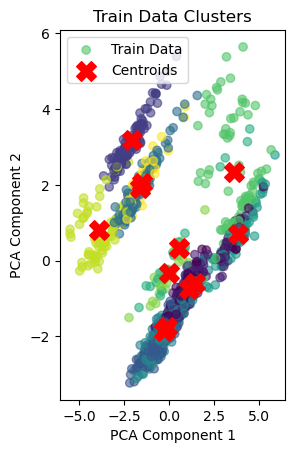

In [132]:
# train clusters
plt.subplot(1, 2, 1)
plt.scatter(train_pca[:, 0], train_pca[:, 1], c=train_clusters, cmap='viridis', alpha=0.6, label="Train Data")
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', marker='X', s=200, label="Centroids")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Train Data Clusters")
plt.legend()

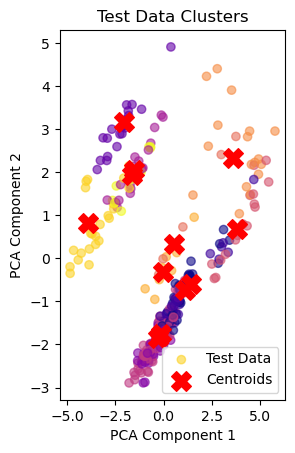

In [134]:
# test clusters 
plt.subplot(1, 2, 2)
plt.scatter(test_pca[:, 0], test_pca[:, 1], c=test_clusters, cmap='plasma', alpha=0.6, label="Test Data")
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', marker='X', s=200, label="Centroids")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Test Data Clusters")
plt.legend()

In [136]:
train_silhouette = silhouette_score(train_scaled, train_clusters)
test_silhouette = silhouette_score(test_scaled, test_clusters)

In [138]:
print(f"\n **Evaluation Results** ")
print(f" Train Silhouette Score: {train_silhouette:.3f}")
print(f" Test Silhouette Score: {test_silhouette:.3f}")


 **Evaluation Results** 
 Train Silhouette Score: 0.108
 Test Silhouette Score: 0.108


In [140]:
if train_silhouette > 0.5:
    print(" The clustering on TRAIN data is well-formed and distinct.")
elif 0.2 < train_silhouette <= 0.5:
    print(" The clusters on TRAIN data are somewhat meaningful but overlap.")
else:
    print(" Poor clustering on TRAIN data. Consider adjusting K or trying another method.")

if test_silhouette > 0.5:
    print(" The clustering on TEST data is well-formed and distinct.")
elif 0.2 < test_silhouette <= 0.5:
    print(" The clusters on TEST data are somewhat meaningful but overlap.")
else:
    print(" Poor clustering on TEST data. The test points do not fit well into the trained clusters.")

 Poor clustering on TRAIN data. Consider adjusting K or trying another method.
 Poor clustering on TEST data. The test points do not fit well into the trained clusters.
